In [1]:
from tensorflow.keras.layers import (Input, Dense,Activation, BatchNormalization, Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, LSTM, GRU, Embedding, Bidirectional,
                         Concatenate,Dropout, Embedding,Convolution1D, Flatten,Layer)
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
# import pydot_ng as pydot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model,model_to_dot  

from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
from layers import MultiHeadAttention,Attention,AttLayer
from scipy import interp
from our_model import CNN_BiGRU,CNN_GRU,CNN_LSTM,CNN_model
import numpy as np
my_seed = 42
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

In [2]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.4f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
#     plt.savefig('ROC-240.png')
    plt.show()

### 关于CNN-LSTM

Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.6833
Epoch 1: val_accuracy improved from -inf to 0.65979, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel1.tf
97/97 [==============================] - 8s 19ms/step - loss: 0.5759 - accuracy: 0.6833 - val_loss: 0.5915 - val_accuracy: 0.6598
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8486
Epoch 2: val_accuracy improved from 0.65979 to 0.80928, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 14ms/step - loss: 0.3593 - accuracy: 0.8489 - val_loss: 0.4078 - val_accuracy: 0.8093
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 0.3102 - accuracy: 0.8727
Epoch 3: val_accuracy improved from 0.80928 to 0.84021, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 14ms/step

Epoch 27/100
94/97 [============================>.] - ETA: 0s - loss: 0.0900 - accuracy: 0.9621
Epoch 27: val_accuracy did not improve from 0.93041
97/97 [==============================] - 1s 14ms/step - loss: 0.0913 - accuracy: 0.9620 - val_loss: 0.2064 - val_accuracy: 0.9291
Epoch 28/100
94/97 [============================>.] - ETA: 0s - loss: 0.0831 - accuracy: 0.9678
Epoch 28: val_accuracy did not improve from 0.93041
97/97 [==============================] - 1s 13ms/step - loss: 0.0836 - accuracy: 0.9675 - val_loss: 0.2388 - val_accuracy: 0.9253
Epoch 29/100
93/97 [===========================>..] - ETA: 0s - loss: 0.0843 - accuracy: 0.9681
Epoch 29: val_accuracy did not improve from 0.93041
97/97 [==============================] - 1s 13ms/step - loss: 0.0828 - accuracy: 0.9684 - val_loss: 0.2426 - val_accuracy: 0.9278
Epoch 30/100
95/97 [============================>.] - ETA: 0s - loss: 0.0851 - accuracy: 0.9618
Epoch 30: val_accuracy did not improve from 0.93041
97/97 [===========

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9560399617387608
Accuracy: [0.8010309338569641]
Sensitivity:  [0.977319587628866]
Specificity:  [0.6247422680412371]
MCC: [0.6433778539221786]
Precision:  [0.7225609756097561]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7402
Epoch 1: val_accuracy improved from -inf to 0.81572, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel2.tf
97/97 [==============================] - 3s 18ms/step - loss: 0.5315 - accuracy: 0.7410 - val_loss: 0.4611 - val_accuracy: 0.8157
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8646
Epoch 2: val_accuracy did not improve from 0.81572
97/97 [==============================] - 1s 14ms/step - loss: 0.3217 - accuracy: 0.8637 - val_loss: 0.8034 - val_accuracy: 0.6108
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.8827
Epoch 3: val_accuracy did not improve from 0.81572
97/97 [==============================]

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9687533212881285
Accuracy: [0.8010309338569641, 0.8793814182281494]
Sensitivity:  [0.977319587628866, 0.9567010309278351]
Specificity:  [0.6247422680412371, 0.8020618556701031]
MCC: [0.6433778539221786, 0.7680011614393075]
Precision:  [0.7225609756097561, 0.8285714285714286]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5362 - accuracy: 0.7300
Epoch 1: val_accuracy improved from -inf to 0.72938, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel3.tf
97/97 [==============================] - 3s 19ms/step - loss: 0.5362 - accuracy: 0.7300 - val_loss: 0.5330 - val_accuracy: 0.7294
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8576
Epoch 2: val_accuracy improved from 0.72938 to 0.80799, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel3.tf
97/97 [==============================] - 2s 16ms/step - loss: 0.3363 - accuracy: 0.8576 - val_loss: 0.4112 - val_accuracy: 0.8080


97/97 [==============================] - 1s 15ms/step - loss: 0.0947 - accuracy: 0.9601 - val_loss: 0.2255 - val_accuracy: 0.9162
Epoch 27/100
96/97 [============================>.] - ETA: 0s - loss: 0.0904 - accuracy: 0.9658
Epoch 27: val_accuracy did not improve from 0.92655
97/97 [==============================] - 1s 15ms/step - loss: 0.0907 - accuracy: 0.9659 - val_loss: 0.2537 - val_accuracy: 0.9111
Epoch 28/100
95/97 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9651
Epoch 28: val_accuracy did not improve from 0.92655
97/97 [==============================] - 1s 14ms/step - loss: 0.0805 - accuracy: 0.9655 - val_loss: 0.2804 - val_accuracy: 0.9137
Epoch 29/100
95/97 [============================>.] - ETA: 0s - loss: 0.0779 - accuracy: 0.9694
Epoch 29: val_accuracy did not improve from 0.92655
97/97 [==============================] - 1s 14ms/step - loss: 0.0771 - accuracy: 0.9697 - val_loss: 0.2596 - val_accuracy: 0.9227
Epoch 30/100
96/97 [================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9721033053459454
Accuracy: [0.8010309338569641, 0.8793814182281494, 0.9020618796348572]
Sensitivity:  [0.977319587628866, 0.9567010309278351, 0.8474226804123711]
Specificity:  [0.6247422680412371, 0.8020618556701031, 0.9567010309278351]
MCC: [0.6433778539221786, 0.7680011614393075, 0.8089684713315014]
Precision:  [0.7225609756097561, 0.8285714285714286, 0.9513888888888888]
Epoch 1/100
94/97 [============================>.] - ETA: 0s - loss: 0.5236 - accuracy: 0.7324
Epoch 1: val_accuracy improved from -inf to 0.76675, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel4.tf
97/97 [==============================] - 3s 19ms/step - loss: 0.5165 - accuracy: 0.7365 - val_loss: 0.4902 - val_accuracy: 0.7668
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3139 - accuracy: 0.8711
Epoch 2: val_accuracy improved from 0.76675 to 0.80155, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel4.tf
97/97 [=======================

Epoch 27/100
93/97 [===========================>..] - ETA: 0s - loss: 0.0840 - accuracy: 0.9708
Epoch 27: val_accuracy did not improve from 0.93943
97/97 [==============================] - 1s 14ms/step - loss: 0.0841 - accuracy: 0.9713 - val_loss: 0.2016 - val_accuracy: 0.9343
Epoch 28/100
97/97 [==============================] - ETA: 0s - loss: 0.0766 - accuracy: 0.9688
Epoch 28: val_accuracy did not improve from 0.93943
97/97 [==============================] - 1s 14ms/step - loss: 0.0766 - accuracy: 0.9688 - val_loss: 0.2524 - val_accuracy: 0.9317
Epoch 29/100
96/97 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.9642
Epoch 29: val_accuracy did not improve from 0.93943
97/97 [==============================] - 1s 14ms/step - loss: 0.0814 - accuracy: 0.9646 - val_loss: 0.2514 - val_accuracy: 0.9304
Epoch 29: early stopping
31/31 [==============================] - 0s 6ms/step - loss: 0.3394 - accuracy: 0.9124


D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9725348070995854
Accuracy: [0.8010309338569641, 0.8793814182281494, 0.9020618796348572, 0.9123711585998535]
Sensitivity:  [0.977319587628866, 0.9567010309278351, 0.8474226804123711, 0.9051546391752577]
Specificity:  [0.6247422680412371, 0.8020618556701031, 0.9567010309278351, 0.9195876288659793]
MCC: [0.6433778539221786, 0.7680011614393075, 0.8089684713315014, 0.8248281829864855]
Precision:  [0.7225609756097561, 0.8285714285714286, 0.9513888888888888, 0.9184100418410042]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5595 - accuracy: 0.7083
Epoch 1: val_accuracy improved from -inf to 0.82474, saving model to my_model_compara/model_cnn_lstm2/our_model_test\firstModel5.tf
97/97 [==============================] - 3s 19ms/step - loss: 0.5577 - accuracy: 0.7091 - val_loss: 0.4446 - val_accuracy: 0.8247
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3676 - accuracy: 0.8428
Epoch 2: val_accuracy improved from 0.82474 to 0.85954, saving mo

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


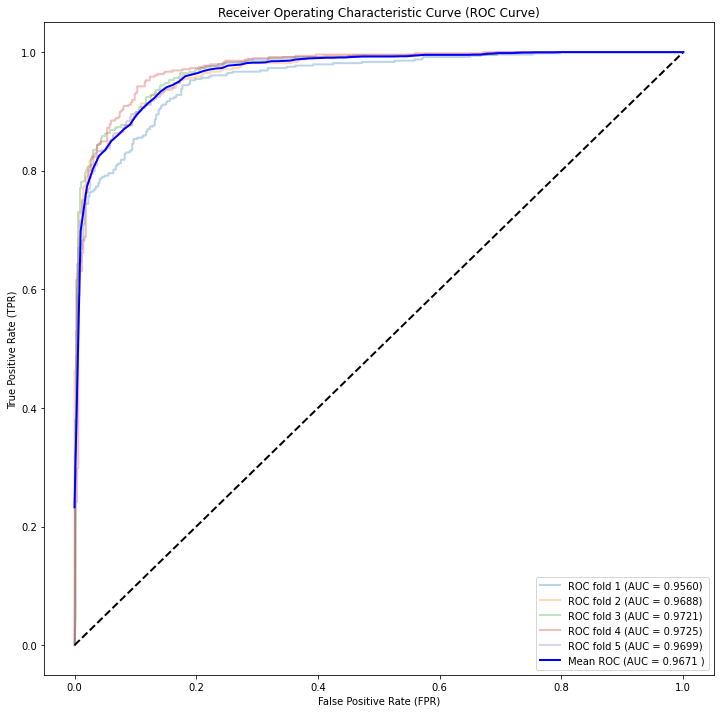

Accuracy [Each Fold]: [0.8010309338569641, 0.8793814182281494, 0.9020618796348572, 0.9123711585998535, 0.8525773286819458]
Accuracy: 0.8695
Sensitivity: 0.8808
Specificity: 0.8581
MCC: 0.7555
Precision: 0.8808


In [4]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('data/Process_data/X444455555.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = CNN_LSTM()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_compara/model_cnn_lstm2/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))

Epoch 1/100
90/97 [==========================>...] - ETA: 0s - loss: 0.6441 - accuracy: 0.6465
Epoch 00001: val_accuracy improved from -inf to 0.75773, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 10ms/step - loss: 0.6375 - accuracy: 0.6543 - val_loss: 0.6008 - val_accuracy: 0.7577
Epoch 2/100
90/97 [==========================>...] - ETA: 0s - loss: 0.4502 - accuracy: 0.7924
Epoch 00002: val_accuracy improved from 0.75773 to 0.83376, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 9ms/step - loss: 0.4516 - accuracy: 0.7928 - val_loss: 0.4245 - val_accuracy: 0.8338
Epoch 3/100
93/97 [===========================>..] - ETA: 0s - loss: 0.3736 - accuracy: 0.8296
Epoch 00003: val_accuracy improved from 0.83376 to 0.86856, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel1.tf
97/97 [==============================] - 1

C:\Users\c's'z\AppData\Local\Temp/ipykernel_5704/4117705347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.969531299819322
Accuracy: [0.8979381322860718]
Sensitivity:  [0.8597938144329897]
Specificity:  [0.9360824742268041]
MCC: [0.7982024310682898]
Precision:  [0.9308035714285714]
Epoch 1/100
93/97 [===========================>..] - ETA: 0s - loss: 0.6597 - accuracy: 0.6351
Epoch 00001: val_accuracy improved from -inf to 0.71005, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel2.tf
97/97 [==============================] - 1s 10ms/step - loss: 0.6585 - accuracy: 0.6379 - val_loss: 0.6164 - val_accuracy: 0.7101
Epoch 2/100
94/97 [============================>.] - ETA: 0s - loss: 0.4705 - accuracy: 0.7872
Epoch 00002: val_accuracy improved from 0.71005 to 0.81572, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel2.tf
97/97 [==============================] - 1s 8ms/step - loss: 0.4718 - accuracy: 0.7858 - val_loss: 0.4735 - val_accuracy: 0.8157
Epoch 3/100
92/97 [===========================>..] - ETA: 0s - loss: 0.3702 - accuracy: 0.840

C:\Users\c's'z\AppData\Local\Temp/ipykernel_5704/4117705347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.961845041981082
Accuracy: [0.8979381322860718, 0.8917526006698608]
Sensitivity:  [0.8597938144329897, 0.8680412371134021]
Specificity:  [0.9360824742268041, 0.9154639175257732]
MCC: [0.7982024310682898, 0.784387659955696]
Precision:  [0.9308035714285714, 0.9112554112554112]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6575 - accuracy: 0.6481
Epoch 00001: val_accuracy improved from -inf to 0.55541, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel3.tf
97/97 [==============================] - 1s 10ms/step - loss: 0.6564 - accuracy: 0.6485 - val_loss: 0.6763 - val_accuracy: 0.5554
Epoch 2/100
93/97 [===========================>..] - ETA: 0s - loss: 0.4875 - accuracy: 0.7692
Epoch 00002: val_accuracy improved from 0.55541 to 0.80284, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel3.tf
97/97 [==============================] - 1s 9ms/step - loss: 0.4811 - accuracy: 0.7703 - val_loss: 0.4712 - val_accuracy: 0

Epoch 26/100
97/97 [==============================] - ETA: 0s - loss: 0.1037 - accuracy: 0.9578
Epoch 00026: val_accuracy did not improve from 0.92397
97/97 [==============================] - 1s 8ms/step - loss: 0.1037 - accuracy: 0.9578 - val_loss: 0.2872 - val_accuracy: 0.8763
Epoch 27/100
97/97 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9568
Epoch 00027: val_accuracy did not improve from 0.92397
97/97 [==============================] - 1s 8ms/step - loss: 0.1023 - accuracy: 0.9568 - val_loss: 0.2068 - val_accuracy: 0.9149
Epoch 28/100
97/97 [==============================] - ETA: 0s - loss: 0.0951 - accuracy: 0.9633
Epoch 00028: val_accuracy did not improve from 0.92397
97/97 [==============================] - 1s 8ms/step - loss: 0.0951 - accuracy: 0.9633 - val_loss: 0.3632 - val_accuracy: 0.8686
Epoch 29/100
95/97 [============================>.] - ETA: 0s - loss: 0.1039 - accuracy: 0.9609
Epoch 00029: val_accuracy did not improve from 0.92397
97/97 [==

C:\Users\c's'z\AppData\Local\Temp/ipykernel_5704/4117705347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9756977362100118
Accuracy: [0.8979381322860718, 0.8917526006698608, 0.9061855673789978]
Sensitivity:  [0.8597938144329897, 0.8680412371134021, 0.8742268041237113]
Specificity:  [0.9360824742268041, 0.9154639175257732, 0.9381443298969072]
MCC: [0.7982024310682898, 0.784387659955696, 0.814035686962347]
Precision:  [0.9308035714285714, 0.9112554112554112, 0.933920704845815]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6509 - accuracy: 0.6382
Epoch 00001: val_accuracy improved from -inf to 0.56186, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel4.tf
97/97 [==============================] - 2s 10ms/step - loss: 0.6509 - accuracy: 0.6382 - val_loss: 0.6633 - val_accuracy: 0.5619
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.4913 - accuracy: 0.7587
Epoch 00002: val_accuracy improved from 0.56186 to 0.81186, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel4.tf
97/97 [=================

Epoch 26/100
92/97 [===========================>..] - ETA: 0s - loss: 0.1141 - accuracy: 0.9535
Epoch 00026: val_accuracy did not improve from 0.93686
97/97 [==============================] - 1s 7ms/step - loss: 0.1128 - accuracy: 0.9549 - val_loss: 0.1732 - val_accuracy: 0.9317
Epoch 27/100
90/97 [==========================>...] - ETA: 0s - loss: 0.1041 - accuracy: 0.9563
Epoch 00027: val_accuracy did not improve from 0.93686
97/97 [==============================] - 1s 8ms/step - loss: 0.1063 - accuracy: 0.9568 - val_loss: 0.3869 - val_accuracy: 0.8389
Epoch 28/100
97/97 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9565
Epoch 00028: val_accuracy did not improve from 0.93686
97/97 [==============================] - 1s 8ms/step - loss: 0.1029 - accuracy: 0.9565 - val_loss: 0.1783 - val_accuracy: 0.9317
Epoch 29/100
97/97 [==============================] - ETA: 0s - loss: 0.1028 - accuracy: 0.9572
Epoch 00029: val_accuracy improved from 0.93686 to 0.94201, savi

C:\Users\c's'z\AppData\Local\Temp/ipykernel_5704/4117705347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9596322669784247
Accuracy: [0.8979381322860718, 0.8917526006698608, 0.9061855673789978, 0.8814433217048645]
Sensitivity:  [0.8597938144329897, 0.8680412371134021, 0.8742268041237113, 0.9216494845360824]
Specificity:  [0.9360824742268041, 0.9154639175257732, 0.9381443298969072, 0.8412371134020619]
MCC: [0.7982024310682898, 0.784387659955696, 0.814035686962347, 0.7653650935489335]
Precision:  [0.9308035714285714, 0.9112554112554112, 0.933920704845815, 0.8530534351145038]
Epoch 1/100
94/97 [============================>.] - ETA: 0s - loss: 0.6536 - accuracy: 0.6426
Epoch 00001: val_accuracy improved from -inf to 0.63660, saving model to my_model_compara/model_cnn_model/our_model_test\firstModel5.tf
97/97 [==============================] - 1s 10ms/step - loss: 0.6508 - accuracy: 0.6463 - val_loss: 0.6024 - val_accuracy: 0.6366
Epoch 2/100
90/97 [==========================>...] - ETA: 0s - loss: 0.4778 - accuracy: 0.7740
Epoch 00002: val_accuracy improved from 0.63660 to 0.79381, sav

C:\Users\c's'z\AppData\Local\Temp/ipykernel_5704/4117705347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


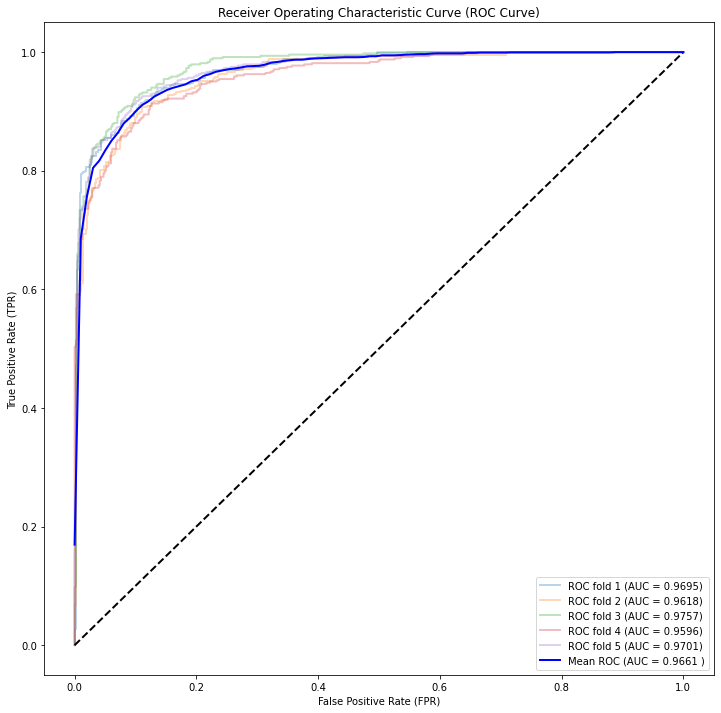

Accuracy [Each Fold]: [0.8979381322860718, 0.8917526006698608, 0.9061855673789978, 0.8814433217048645, 0.9030928015708923]
Accuracy: 0.8961
Sensitivity: 0.8821
Specificity: 0.9101
MCC: 0.7937
Precision: 0.9092


In [7]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('data/Process_data/X444455555.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = CNN_model()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_compara/model_cnn_model2/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))

Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.7023
Epoch 1: val_accuracy improved from -inf to 0.72552, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel1.tf
97/97 [==============================] - 3s 17ms/step - loss: 0.5793 - accuracy: 0.7023 - val_loss: 0.5222 - val_accuracy: 0.7255
Epoch 2/100
92/97 [===========================>..] - ETA: 0s - loss: 0.3653 - accuracy: 0.8458
Epoch 2: val_accuracy improved from 0.72552 to 0.74485, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 12ms/step - loss: 0.3645 - accuracy: 0.8470 - val_loss: 0.5348 - val_accuracy: 0.7448
Epoch 3/100
93/97 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8733
Epoch 3: val_accuracy improved from 0.74485 to 0.87371, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel1.tf
97/97 [==============================] - 1s 12ms/step - 

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9754830481453927
Accuracy: [0.9092783331871033]
Sensitivity:  [0.8783505154639175]
Specificity:  [0.9402061855670103]
MCC: [0.8201271587333586]
Precision:  [0.9362637362637363]
Epoch 1/100
93/97 [===========================>..] - ETA: 0s - loss: 0.5931 - accuracy: 0.6825
Epoch 1: val_accuracy improved from -inf to 0.71005, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel2.tf
97/97 [==============================] - 3s 15ms/step - loss: 0.5872 - accuracy: 0.6875 - val_loss: 0.5431 - val_accuracy: 0.7101
Epoch 2/100
95/97 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8464
Epoch 2: val_accuracy improved from 0.71005 to 0.77964, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel2.tf
97/97 [==============================] - 1s 12ms/step - loss: 0.3495 - accuracy: 0.8457 - val_loss: 0.4611 - val_accuracy: 0.7796
Epoch 3/100
94/97 [============================>.] - ETA: 0s - loss: 0.2799 - accuracy: 0.8883
Epoch 

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9614454245934744
Accuracy: [0.9092783331871033, 0.8752577304840088]
Sensitivity:  [0.8783505154639175, 0.9463917525773196]
Specificity:  [0.9402061855670103, 0.8041237113402062]
MCC: [0.8201271587333586, 0.7582280311966966]
Precision:  [0.9362637362637363, 0.8285198555956679]
Epoch 1/100
92/97 [===========================>..] - ETA: 0s - loss: 0.5426 - accuracy: 0.7221
Epoch 1: val_accuracy improved from -inf to 0.71005, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel3.tf
97/97 [==============================] - 3s 15ms/step - loss: 0.5356 - accuracy: 0.7271 - val_loss: 0.5260 - val_accuracy: 0.7101
Epoch 2/100
94/97 [============================>.] - ETA: 0s - loss: 0.3455 - accuracy: 0.8547
Epoch 2: val_accuracy improved from 0.71005 to 0.79124, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel3.tf
97/97 [==============================] - 1s 12ms/step - loss: 0.3448 - accuracy: 0.8553 - val_loss: 0.4221 - val_accuracy: 0.7912
E

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9735232224465937
Accuracy: [0.9092783331871033, 0.8752577304840088, 0.9082474112510681]
Sensitivity:  [0.8783505154639175, 0.9463917525773196, 0.865979381443299]
Specificity:  [0.9402061855670103, 0.8041237113402062, 0.9505154639175257]
MCC: [0.8201271587333586, 0.7582280311966966, 0.8194280547196174]
Precision:  [0.9362637362637363, 0.8285198555956679, 0.9459459459459459]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7021
Epoch 1: val_accuracy improved from -inf to 0.76418, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel4.tf
97/97 [==============================] - 3s 16ms/step - loss: 0.5546 - accuracy: 0.7039 - val_loss: 0.5068 - val_accuracy: 0.7642
Epoch 2/100
93/97 [===========================>..] - ETA: 0s - loss: 0.3497 - accuracy: 0.8491
Epoch 2: val_accuracy improved from 0.76418 to 0.82345, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel4.tf
97/97 [=========================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9683664576469339
Accuracy: [0.9092783331871033, 0.8752577304840088, 0.9082474112510681, 0.9061855673789978]
Sensitivity:  [0.8783505154639175, 0.9463917525773196, 0.865979381443299, 0.8969072164948454]
Specificity:  [0.9402061855670103, 0.8041237113402062, 0.9505154639175257, 0.9154639175257732]
MCC: [0.8201271587333586, 0.7582280311966966, 0.8194280547196174, 0.8125110406227989]
Precision:  [0.9362637362637363, 0.8285198555956679, 0.9459459459459459, 0.9138655462184874]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7041
Epoch 1: val_accuracy improved from -inf to 0.81186, saving model to my_model_compara/model_cnn_GRU2/our_model_test\firstModel5.tf
97/97 [==============================] - 3s 16ms/step - loss: 0.5532 - accuracy: 0.7052 - val_loss: 0.4720 - val_accuracy: 0.8119
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3484 - accuracy: 0.8545
Epoch 2: val_accuracy improved from 0.81186 to 0.88273, saving mod

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


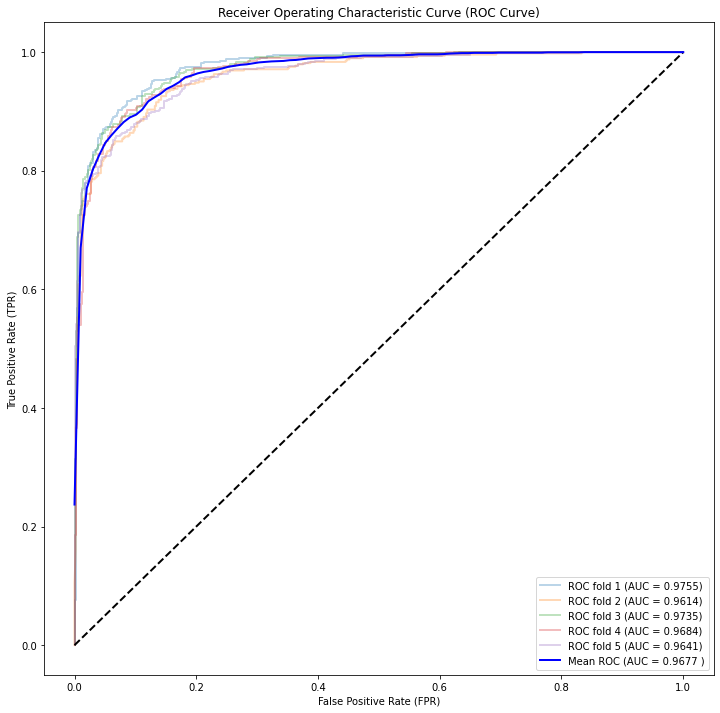

Accuracy [Each Fold]: [0.9092783331871033, 0.8752577304840088, 0.9082474112510681, 0.9061855673789978, 0.8804123997688293]
Accuracy: 0.8959
Sensitivity: 0.8759
Specificity: 0.9159
MCC: 0.7967
Precision: 0.9174


In [5]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('data/Process_data/X444455555.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = CNN_GRU()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_compara/model_cnn_GRU2/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))

Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6009 - accuracy: 0.6706
Epoch 1: val_accuracy improved from -inf to 0.81959, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel1.tf
97/97 [==============================] - 4s 26ms/step - loss: 0.5991 - accuracy: 0.6720 - val_loss: 0.4564 - val_accuracy: 0.8196
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.8405
Epoch 2: val_accuracy improved from 0.81959 to 0.85825, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel1.tf
97/97 [==============================] - 2s 19ms/step - loss: 0.3742 - accuracy: 0.8405 - val_loss: 0.3487 - val_accuracy: 0.8582
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.2990 - accuracy: 0.8796
Epoch 3: val_accuracy did not improve from 0.85825
97/97 [==============================] - 2s 18ms/step - loss: 0.2976 - accuracy: 0.8805 - val_loss: 0.3503 - val_accuracy: 0.8518
Epoch

97/97 [==============================] - 2s 18ms/step - loss: 0.0748 - accuracy: 0.9710 - val_loss: 0.2668 - val_accuracy: 0.9330
Epoch 29/100
95/97 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9750
Epoch 29: val_accuracy did not improve from 0.93299
97/97 [==============================] - 2s 18ms/step - loss: 0.0656 - accuracy: 0.9752 - val_loss: 0.2605 - val_accuracy: 0.9317
Epoch 30/100
95/97 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9668
Epoch 30: val_accuracy did not improve from 0.93299
97/97 [==============================] - 2s 19ms/step - loss: 0.0799 - accuracy: 0.9668 - val_loss: 0.4282 - val_accuracy: 0.9034
Epoch 31/100
96/97 [============================>.] - ETA: 0s - loss: 0.0690 - accuracy: 0.9714
Epoch 31: val_accuracy did not improve from 0.93299
97/97 [==============================] - 2s 19ms/step - loss: 0.0691 - accuracy: 0.9710 - val_loss: 0.2932 - val_accuracy: 0.9201
Epoch 32/100
97/97 [================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9696567116590499
Accuracy: [0.9010308980941772]
Sensitivity:  [0.8391752577319588]
Specificity:  [0.9628865979381444]
MCC: [0.8082707918530541]
Precision:  [0.9576470588235294]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5773 - accuracy: 0.6885
Epoch 1: val_accuracy improved from -inf to 0.73582, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel2.tf
97/97 [==============================] - 5s 28ms/step - loss: 0.5773 - accuracy: 0.6885 - val_loss: 0.5196 - val_accuracy: 0.7358
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.3448 - accuracy: 0.8561
Epoch 2: val_accuracy did not improve from 0.73582
97/97 [==============================] - 2s 19ms/step - loss: 0.3466 - accuracy: 0.8557 - val_loss: 0.6612 - val_accuracy: 0.7049
Epoch 3/100
95/97 [============================>.] - ETA: 0s - loss: 0.2932 - accuracy: 0.8842
Epoch 3: val_accuracy improved from 0.73582 to 0.78608, saving model to my_model_compar

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9590944840046763
Accuracy: [0.9010308980941772, 0.8896906971931458]
Sensitivity:  [0.8391752577319588, 0.8329896907216495]
Specificity:  [0.9628865979381444, 0.9463917525773196]
MCC: [0.8082707918530541, 0.7844417360195097]
Precision:  [0.9576470588235294, 0.9395348837209302]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7119
Epoch 1: val_accuracy improved from -inf to 0.67526, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel3.tf
97/97 [==============================] - 4s 26ms/step - loss: 0.5560 - accuracy: 0.7123 - val_loss: 0.5885 - val_accuracy: 0.6753
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8673
Epoch 2: val_accuracy improved from 0.67526 to 0.80799, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel3.tf
97/97 [==============================] - 2s 18ms/step - loss: 0.3438 - accuracy: 0.8673 - val_loss: 0.4089 - val_accuracy: 0.80

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.954741205229036
Accuracy: [0.9010308980941772, 0.8896906971931458, 0.8195876479148865]
Sensitivity:  [0.8391752577319588, 0.8329896907216495, 0.9711340206185567]
Specificity:  [0.9628865979381444, 0.9463917525773196, 0.668041237113402]
MCC: [0.8082707918530541, 0.7844417360195097, 0.6707254793982066]
Precision:  [0.9576470588235294, 0.9395348837209302, 0.745253164556962]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.7181
Epoch 1: val_accuracy improved from -inf to 0.56314, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel4.tf
97/97 [==============================] - 4s 25ms/step - loss: 0.5431 - accuracy: 0.7181 - val_loss: 0.6795 - val_accuracy: 0.5631
Epoch 2/100
94/97 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8684
Epoch 2: val_accuracy improved from 0.56314 to 0.79510, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel4.tf
97/97 [=======================

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


AUC: 0.9684132213837815
Accuracy: [0.9010308980941772, 0.8896906971931458, 0.8195876479148865, 0.9051546454429626]
Sensitivity:  [0.8391752577319588, 0.8329896907216495, 0.9711340206185567, 0.8927835051546392]
Specificity:  [0.9628865979381444, 0.9463917525773196, 0.668041237113402, 0.9175257731958762]
MCC: [0.8082707918530541, 0.7844417360195097, 0.6707254793982066, 0.8105574197839669]
Precision:  [0.9576470588235294, 0.9395348837209302, 0.745253164556962, 0.9154334038054969]
Epoch 1/100
95/97 [============================>.] - ETA: 0s - loss: 0.5867 - accuracy: 0.6793
Epoch 1: val_accuracy improved from -inf to 0.77062, saving model to my_model_compara/model_cnn_BiGRU2/our_model_test\firstModel5.tf
97/97 [==============================] - 4s 23ms/step - loss: 0.5833 - accuracy: 0.6823 - val_loss: 0.5249 - val_accuracy: 0.7706
Epoch 2/100
95/97 [============================>.] - ETA: 0s - loss: 0.3835 - accuracy: 0.8362
Epoch 2: val_accuracy did not improve from 0.77062
97/97 [=======

D:\Install\anaconda\envs\py3.7\lib\site-packages\ipykernel_launcher.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


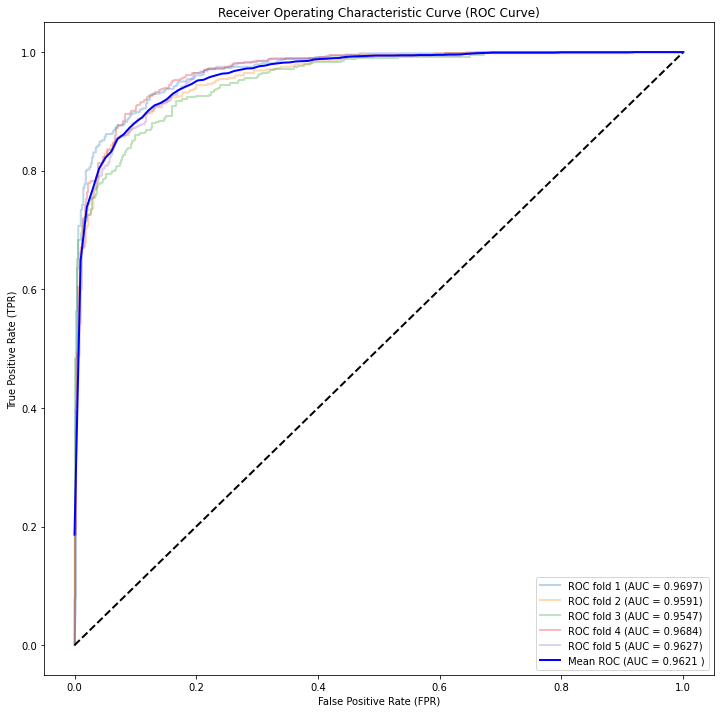

Accuracy [Each Fold]: [0.9010308980941772, 0.8896906971931458, 0.8195876479148865, 0.9051546454429626, 0.8865979313850403]
Accuracy: 0.8804
Sensitivity: 0.8891
Specificity: 0.8718
MCC: 0.7696
Precision: 0.8855


In [6]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('data/Process_data/X444455555.npz')
    X1 = data1['x_train']
    X2 = data1['x_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = CNN_BiGRU()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_compara/model_cnn_BiGRU2/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))